<a href="https://colab.research.google.com/github/mhdykz/predict-student-GPA-using-a-neural-network/blob/main/student_GPA_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam



In [15]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_test = test_data.drop(columns=['StudentID', 'GPA'])
y_test = test_data['GPA']

categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_train_preprocessed.shape, X_val_preprocessed.shape

X_test_preprocessed = preprocessor.transform(X_test)







In [17]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train_preprocessed.shape[1],)))

model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.45))

model.add(layers.Dense(1))

y_pred = model.predict(X_test_preprocessed)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [18]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')


In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val),
                    epochs=2000, batch_size=128, callbacks=[early_stopping])



Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 6.8577 - val_loss: 4.8238
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.0470 - val_loss: 4.6065
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.3686 - val_loss: 4.3954
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.0057 - val_loss: 4.2862
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.9282 - val_loss: 4.1186
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8682 - val_loss: 3.9755
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.0351 - val_loss: 3.8266
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.6210 - val_loss: 3.7346
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.7507 - val_loss: 3.6352
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8706 - val_loss: 3.5800
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.4484 - val_loss: 3.4643
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.

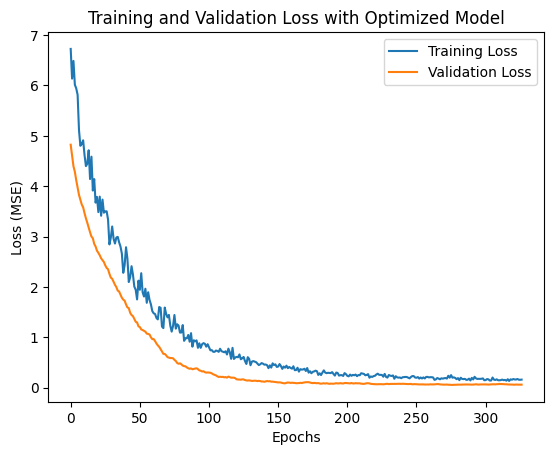

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Optimized R² Score on Test Data: 0.9585206308828176


In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Optimized Model')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

from sklearn.metrics import r2_score


y_pred = model.predict(X_test_preprocessed)
r2 = r2_score(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Optimized R² Score on Test Data: {r2}')